In [15]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import datetime

%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot

## Load data

In [16]:
df = pd.read_csv('avocado.csv')

In [17]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [18]:
df['Revenue'] = df['AveragePrice'] * df['Total Volume']

In [19]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

# Trend Analysis with specific region

In [20]:
def trend_analysis(data, region, feature):
    #create dataframe with region
    data = data[data['region'] == region][['Date', feature, 'type']]
    data.columns = ['ds', 'y', 'type']
    data.loc[:,'ds'] = pd.to_datetime(data['ds'])
    #group by date
    data_o = data[['ds', 'y']][data['type'] == 'organic']
    data_o = data_o.reset_index()
    
    data_c = data[['ds', 'y']][data['type'] == 'conventional']
    data_c = data_c.reset_index(drop = True)
    #print(data_o.head())
    #fbprophet for organic
    m_o = Prophet()
    m_o.fit(data_o)
    #prophet for conventional
    m_c = Prophet()
    m_c.fit(data_c)
    #forecast
    future_o = m_o.make_future_dataframe(periods = 52, freq = 'W', include_history = True)
    forecast_o = m_o.predict(future_o)
    
    future_c = m_c.make_future_dataframe(periods = 52, freq = 'W', include_history = True)
    forecast_c = m_c.predict(future_c)
    
    #take a look at the graph
    #averageprice forecast
    m_o.plot(forecast_o, figsize = (15,10))
    plt.title('Organic Avocados ' + feature + 'forecast in ' + region,size = 16)
    m_c.plot(forecast_c, figsize = (15,10))
    plt.title('Conventional Avocados ' + feature + ' forecast in ' + region,size = 16)
    plt.show()
    
    #averageprice trend
    m_o.plot_components(forecast_o, figsize = (15,10))
    plt.title('Organic Avocados ' + feature + ' trend in ' + region, size = 16)
    m_c.plot_components(forecast_c, figsize = (15,10))
    plt.title('Conventional Avocados ' + feature + ' trend in '+ region, size = 16)
    plt.show()

With the result in regression session analysis, the potential market for targeting are Houston, DallasFtWorth and SouthCentral due to its price low through year comparison with others region. (For more information, take a look at two factorplot in regression file)

### DallasFtWorth

#### AveragePrice

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


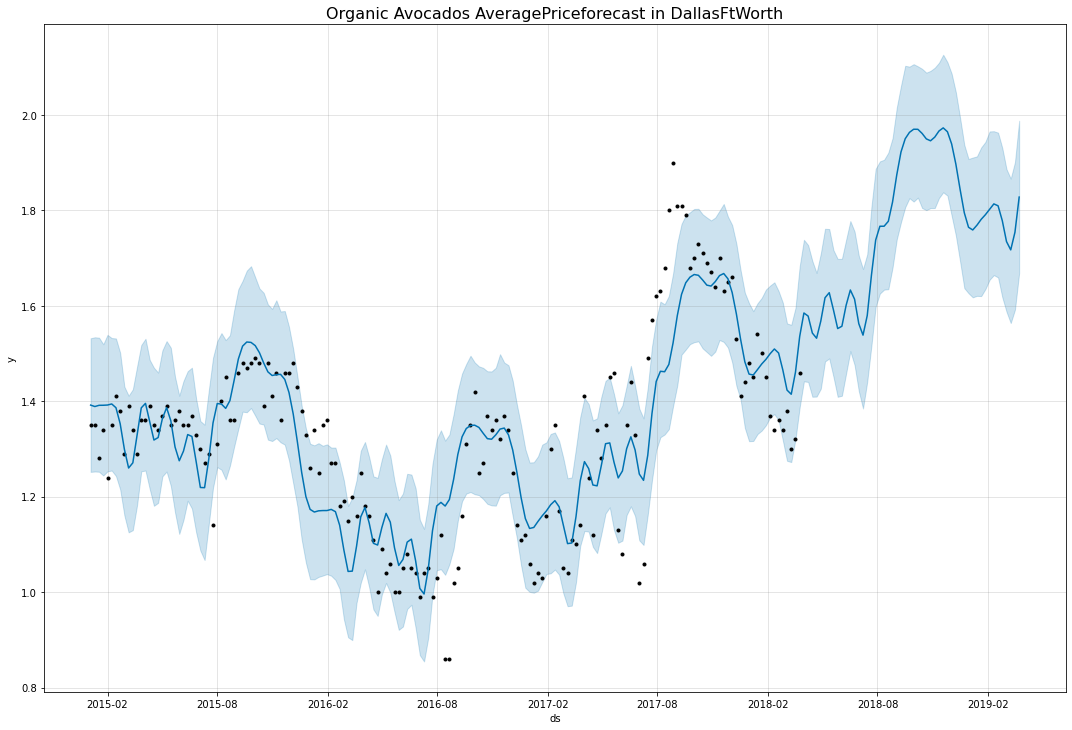

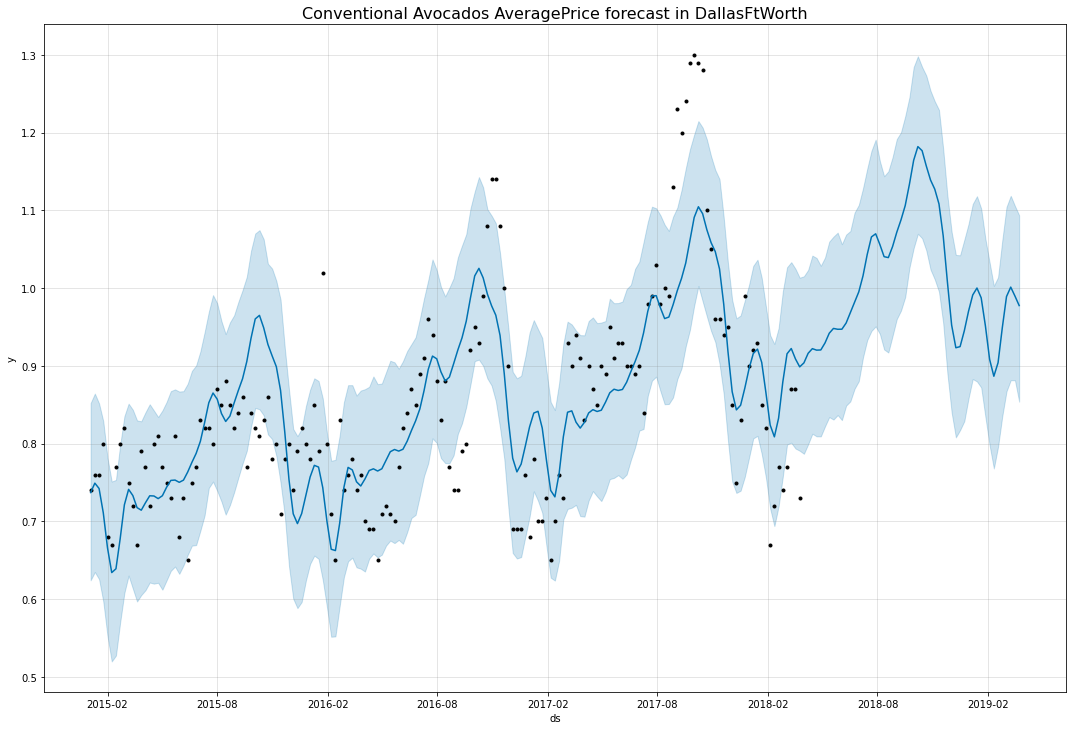

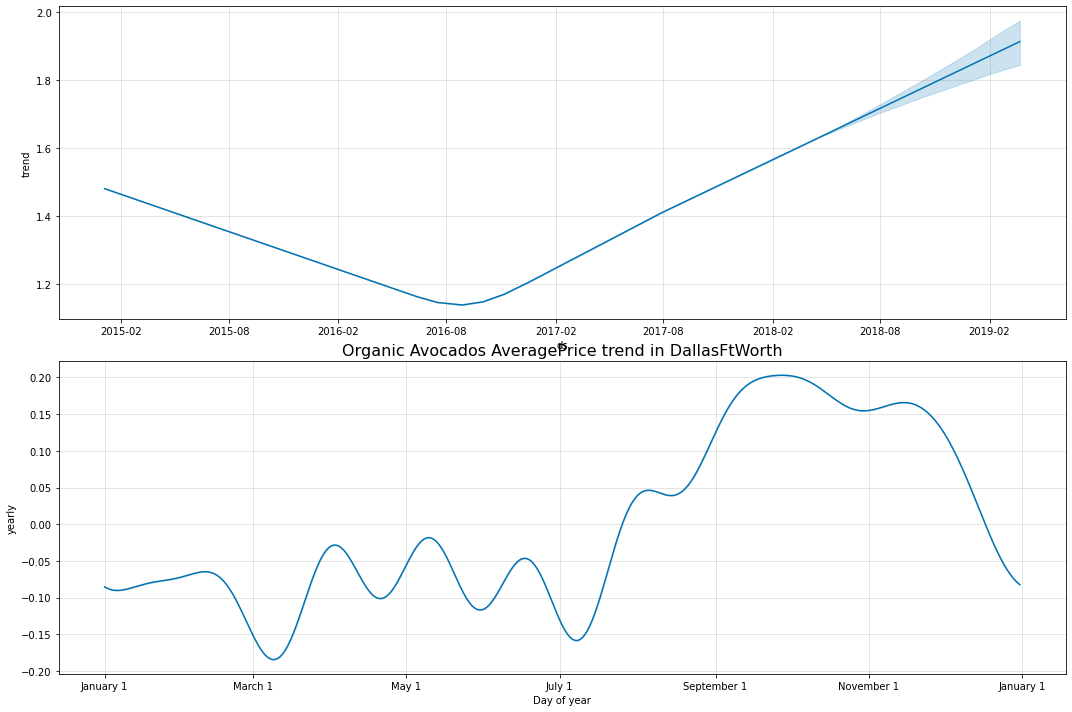

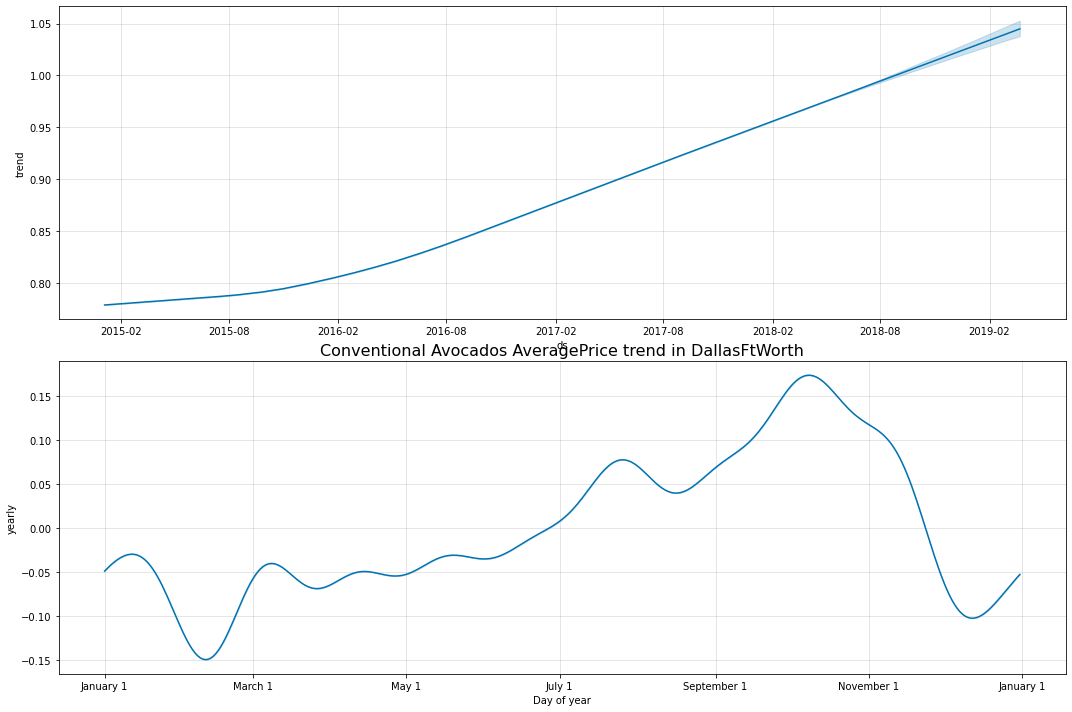

In [21]:
trend_analysis(df, 'DallasFtWorth', 'AveragePrice')

- The Organic and Conventional price have the same trend that is increased through year, Organic have just increased again in 2016. While conventional increased since 2015.
- The price of 2 type droped down from spring until summer, but organic have the stabler price than conventional due to its lasted long price. While the conventional price increased strongly in summer.

#### Total Volume

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


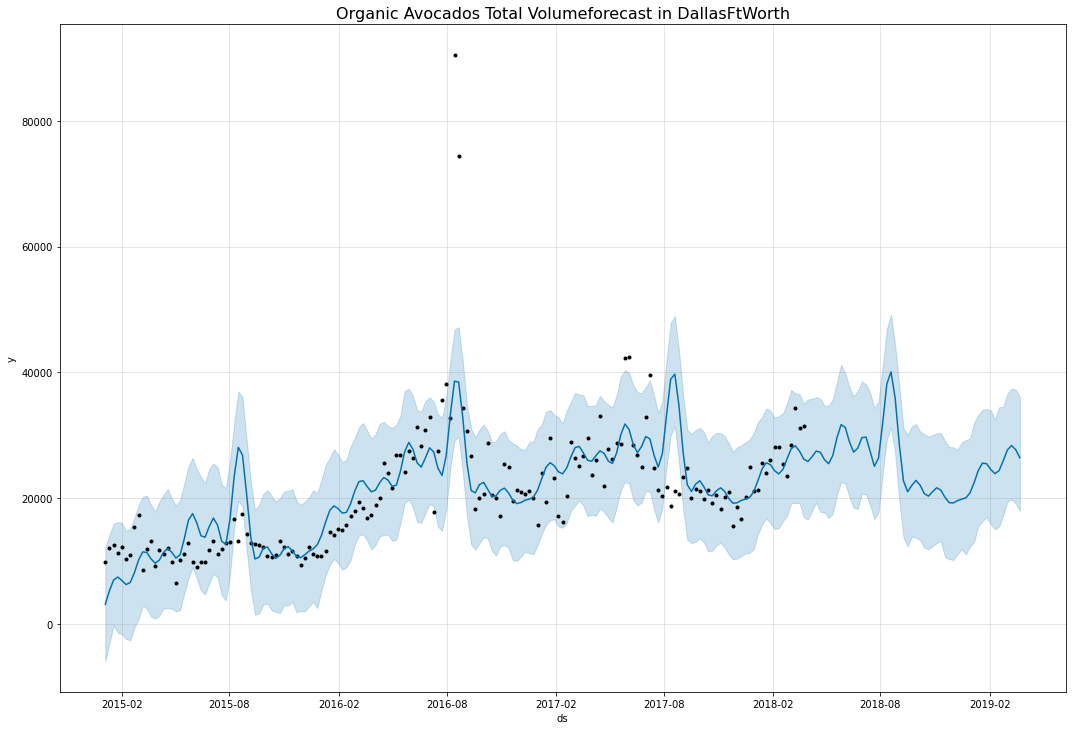

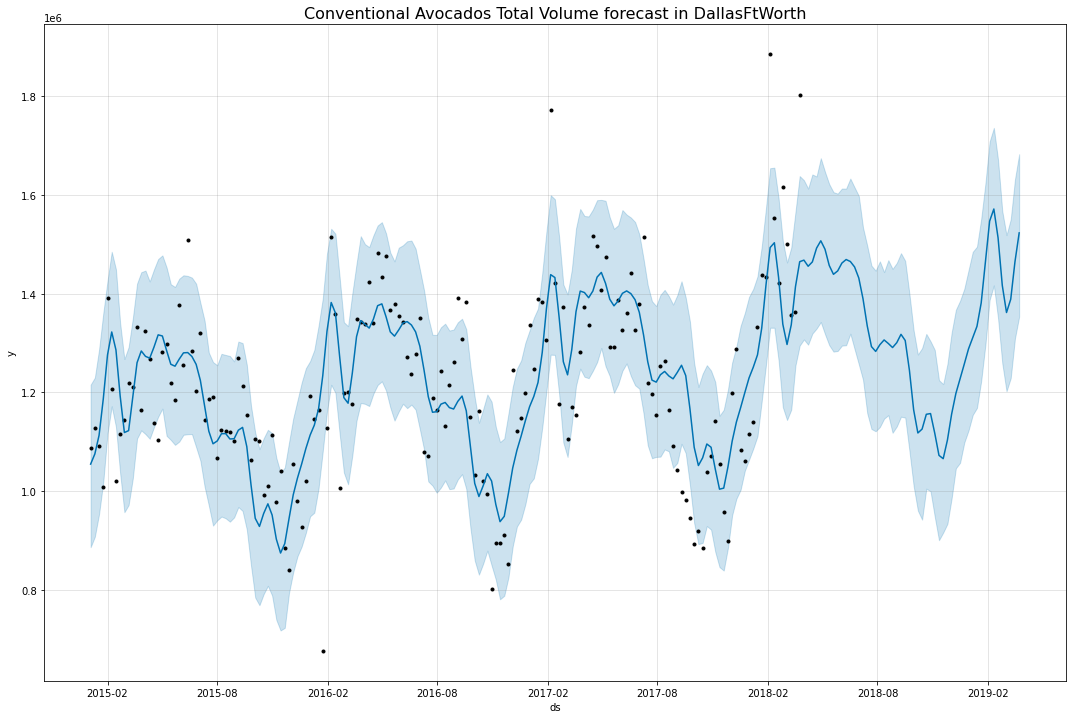

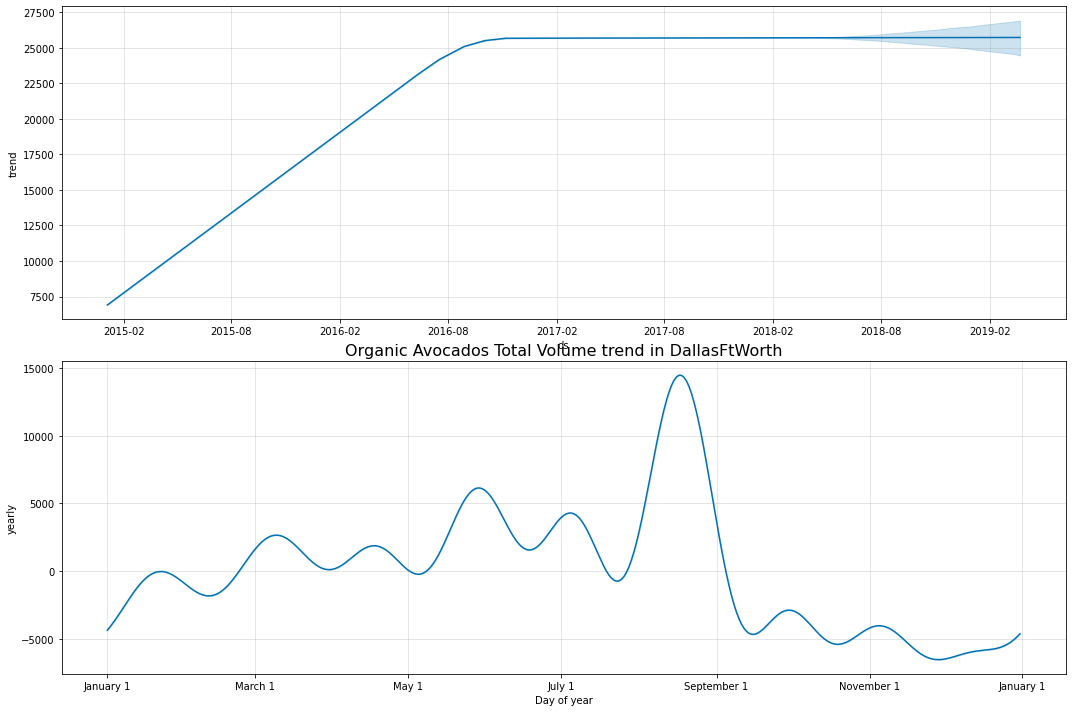

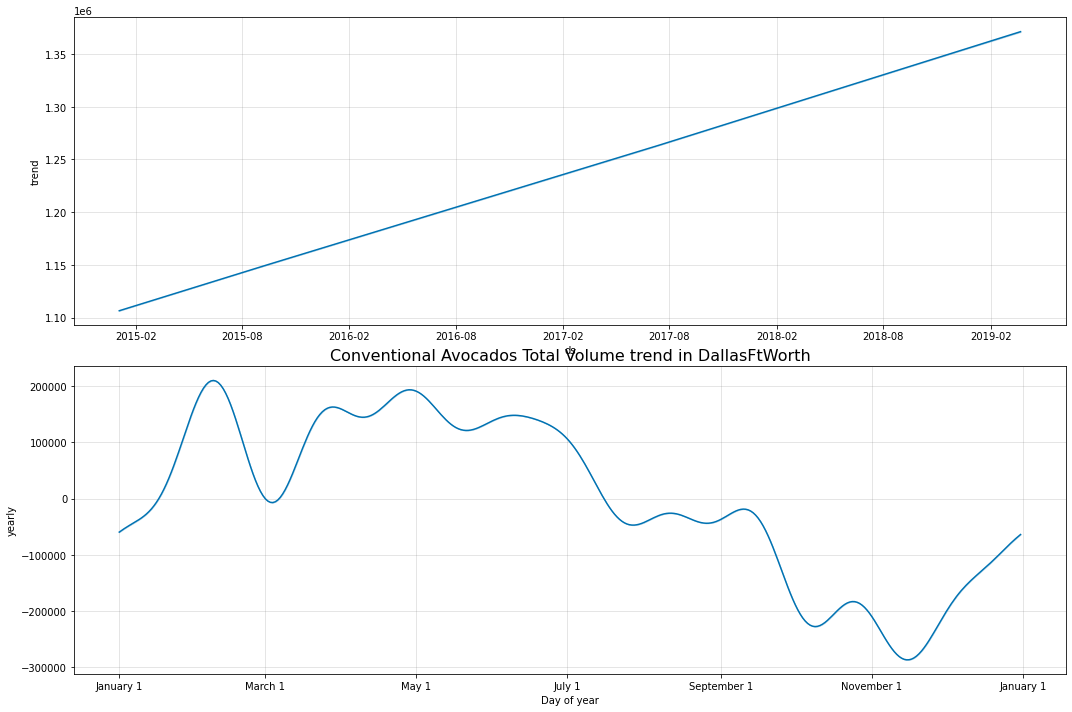

In [22]:
trend_analysis(df, 'DallasFtWorth', 'Total Volume')

- The organic price is stable low sothat the volume will be stable either. The volumn trend will increased since spring but not much, and it will increased and droped down fastly in Sep and Oct.
- The conventional volume showed that conventional avocado is the main consume product in DallasFtWorth region, when volume increased fromspring until summer through year.

#### Revenue

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


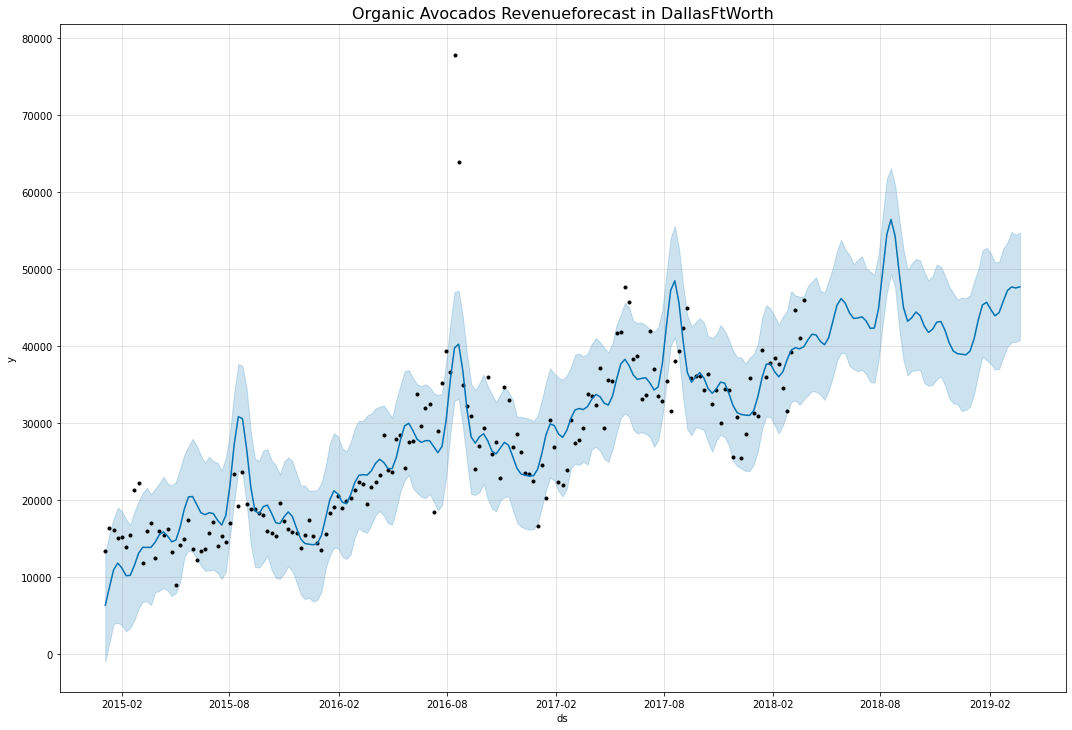

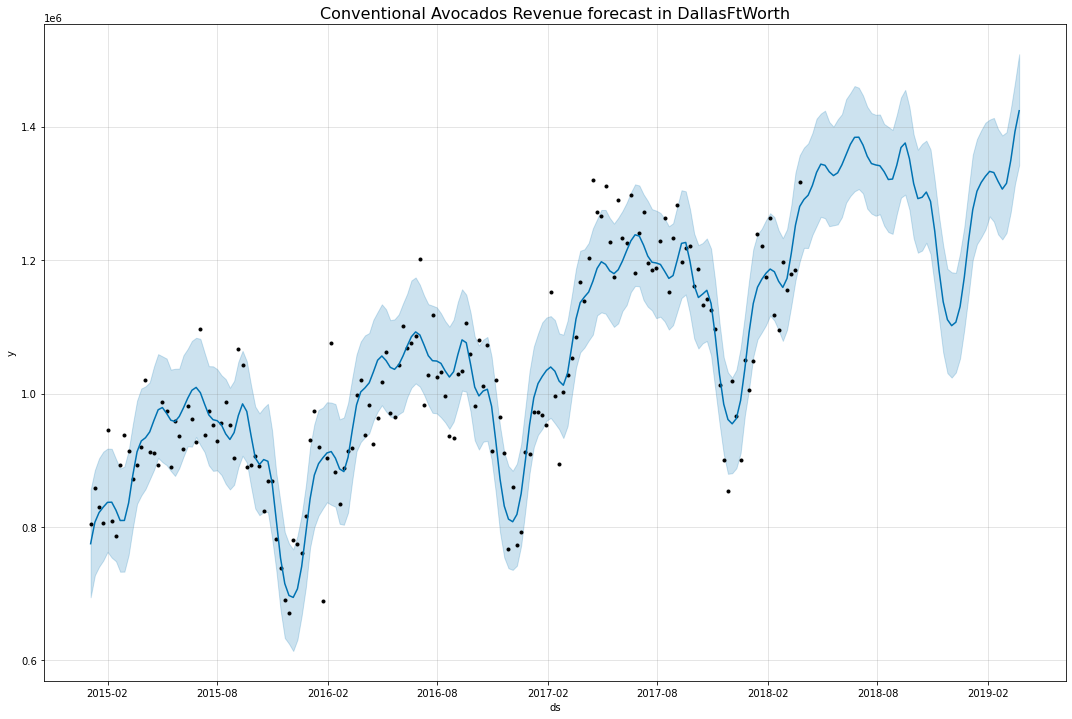

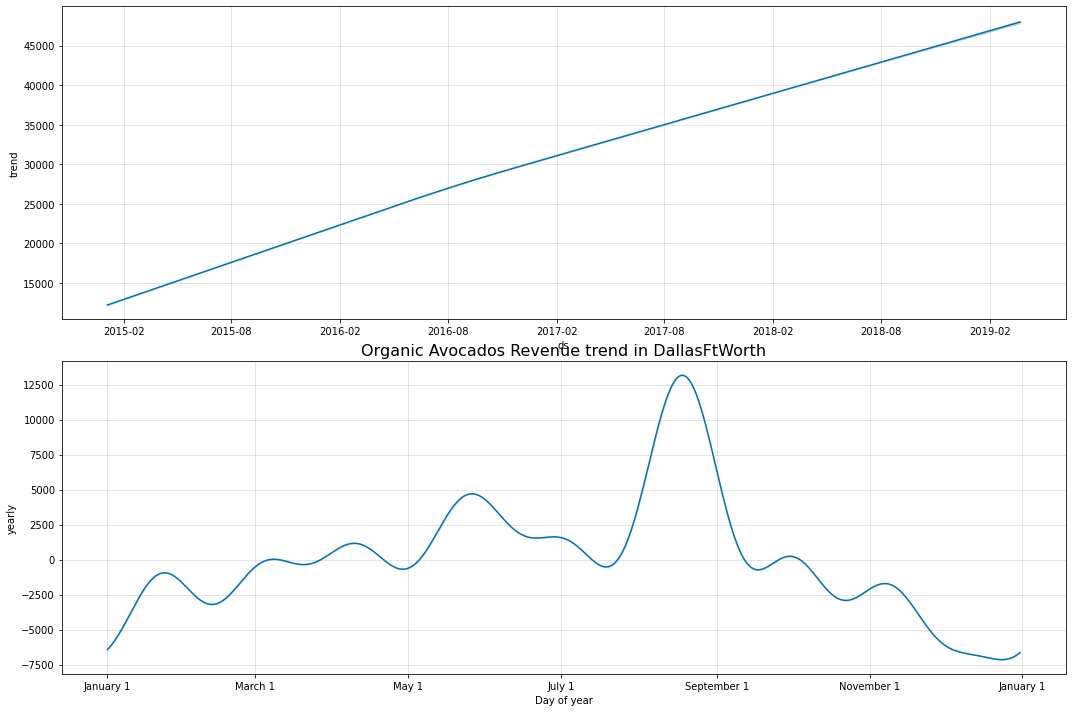

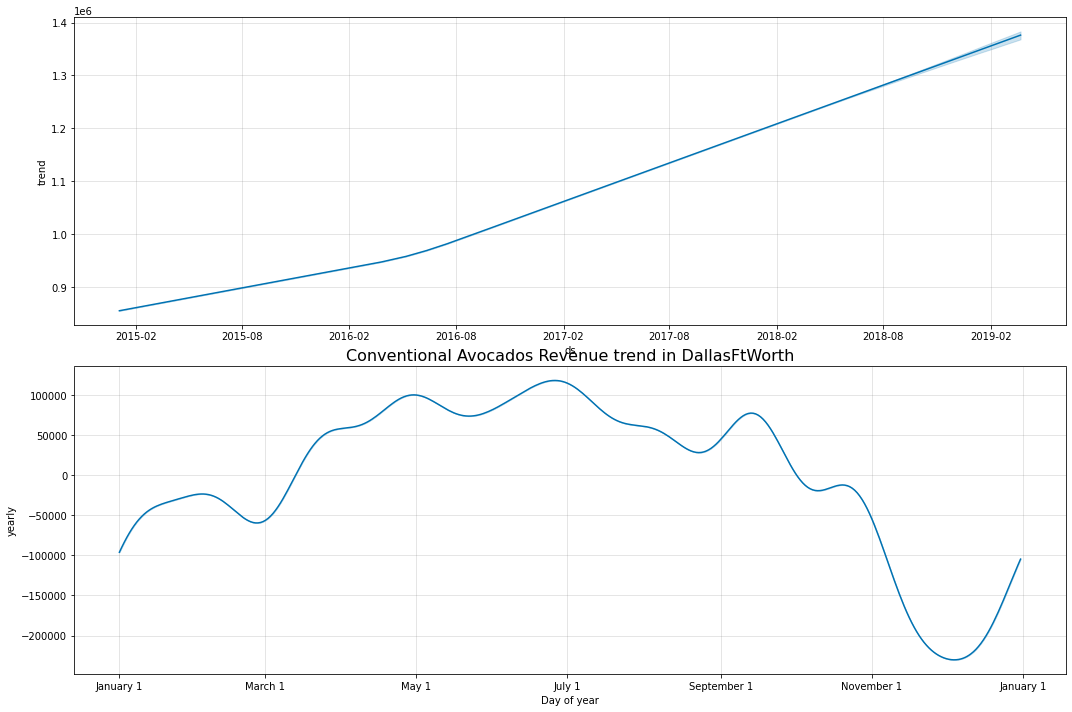

In [23]:
trend_analysis(df, 'DallasFtWorth', 'Revenue')

- Same case as volume, the revenue of conventional avocados will increased through years.

### Houston

#### Average price

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


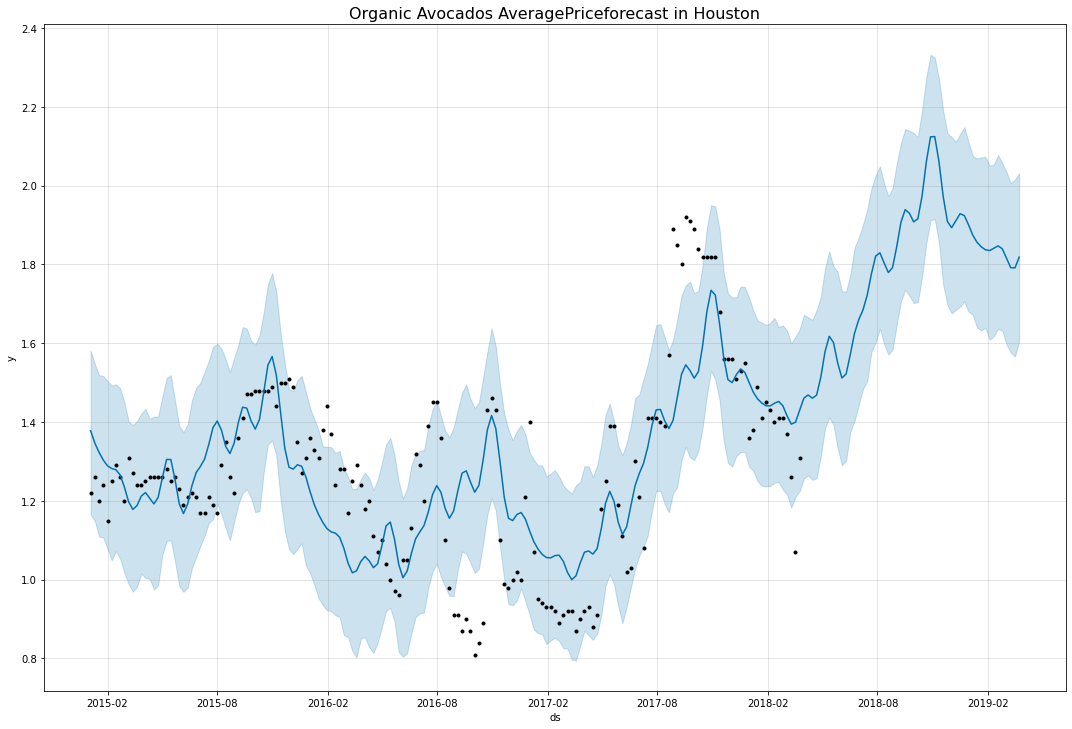

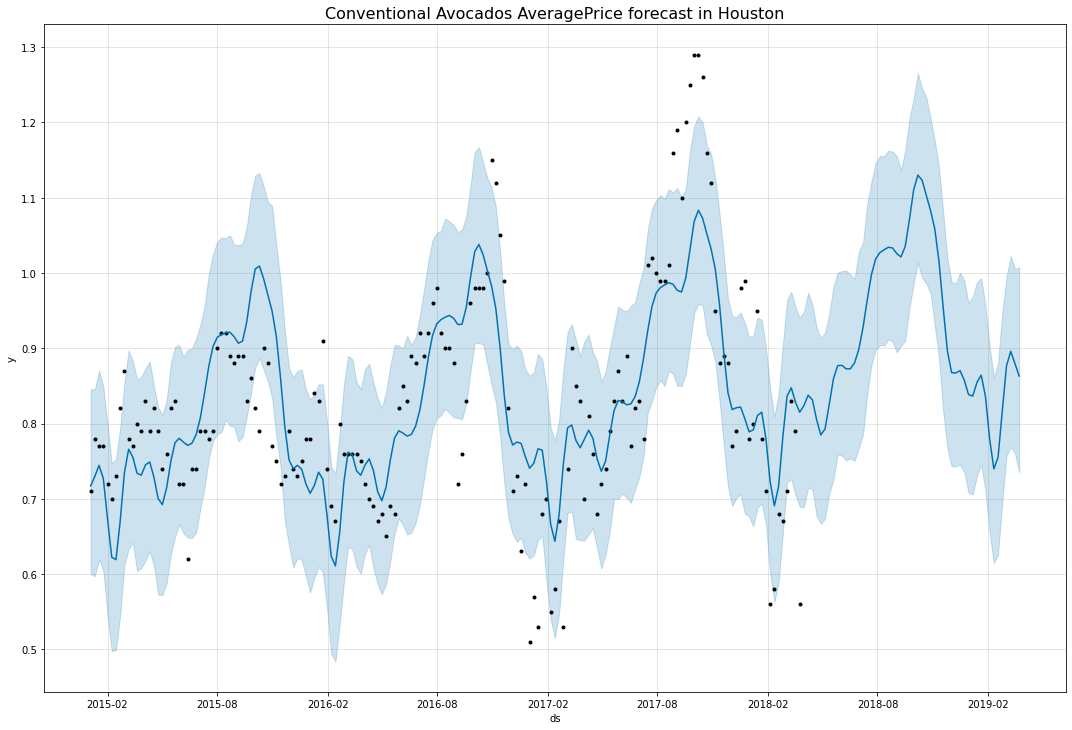

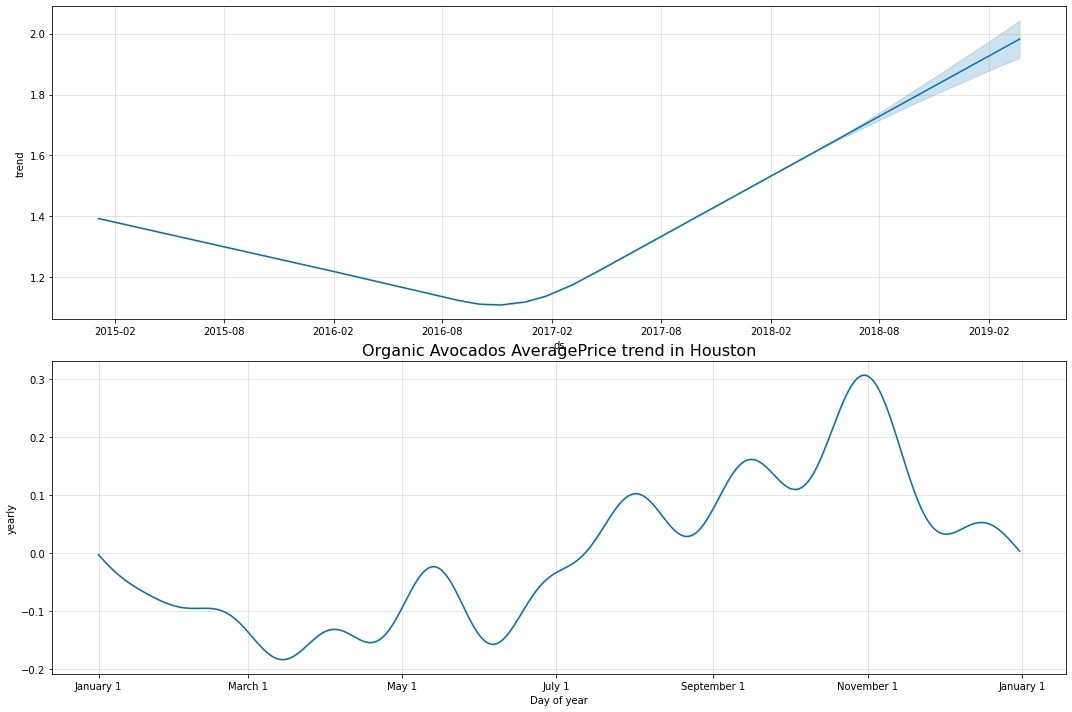

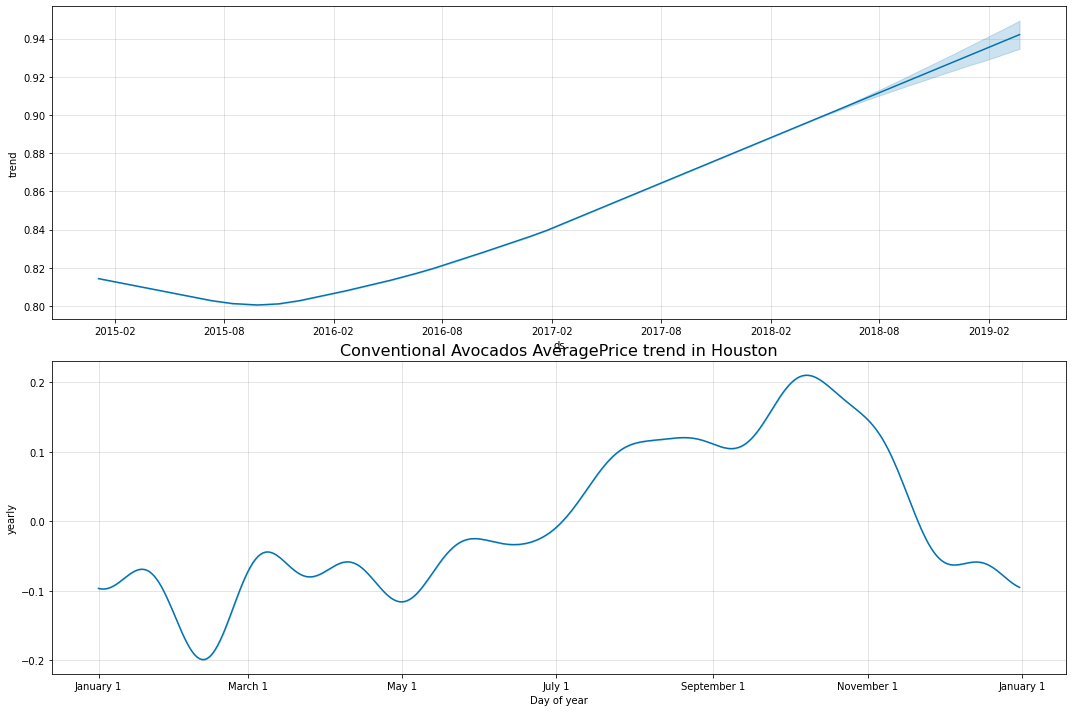

<Figure size 432x288 with 0 Axes>

In [24]:
trend_analysis(df, 'Houston', 'AveragePrice')
plt.savefig('houston1.png')

- The price of Houson is lower than DallasFtWorth.
- Also trend of conventional and organic will be droped down from spring until summer.
- But this year organic prediction will higher than past year, but it still lower than DallasFtWorth.
- Especially, the conventional price droped down really low through year, the lowest seasonal point of every year seem nearly with each other. So that conventional avocados will be very potential if the volume increased.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


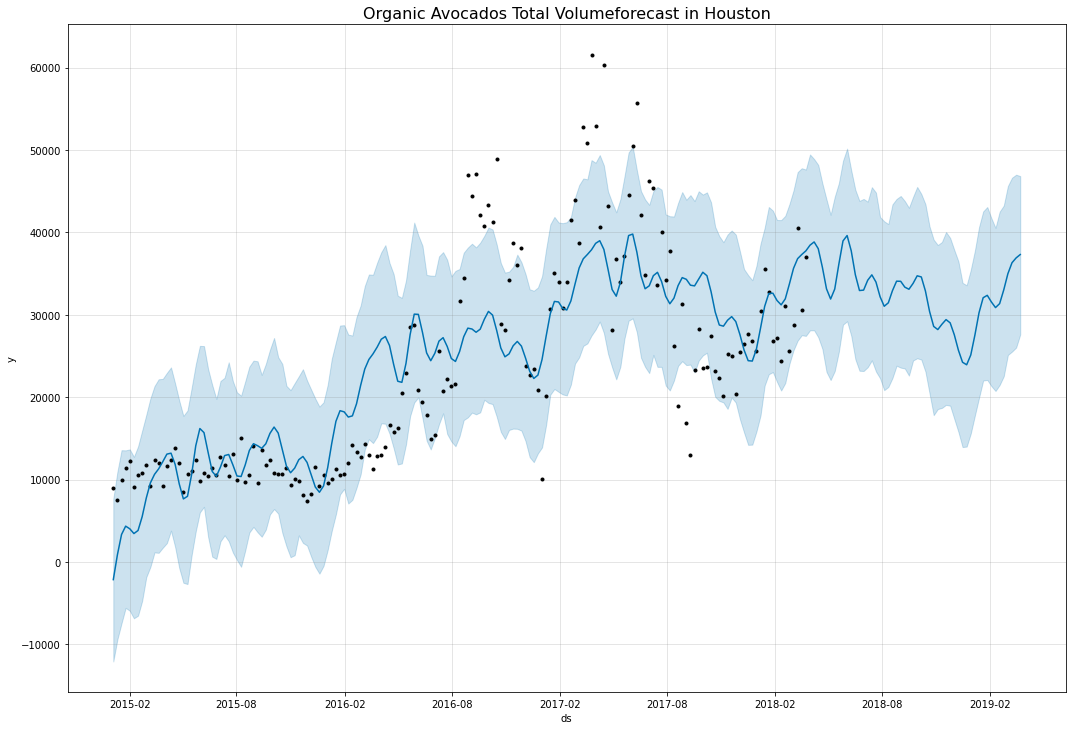

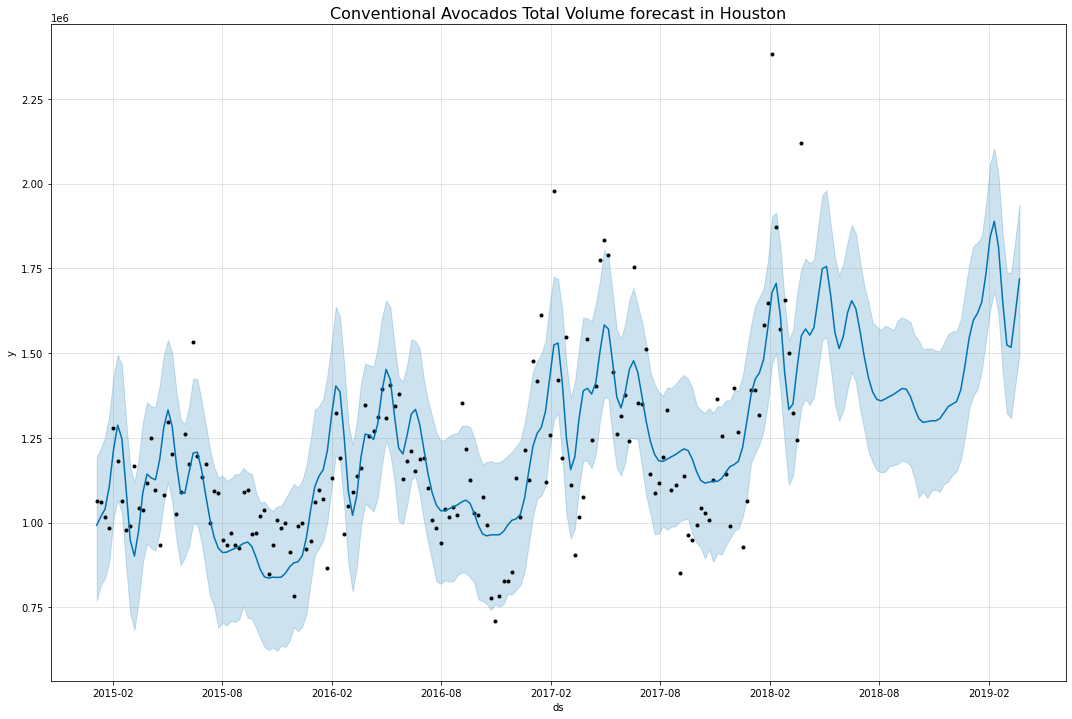

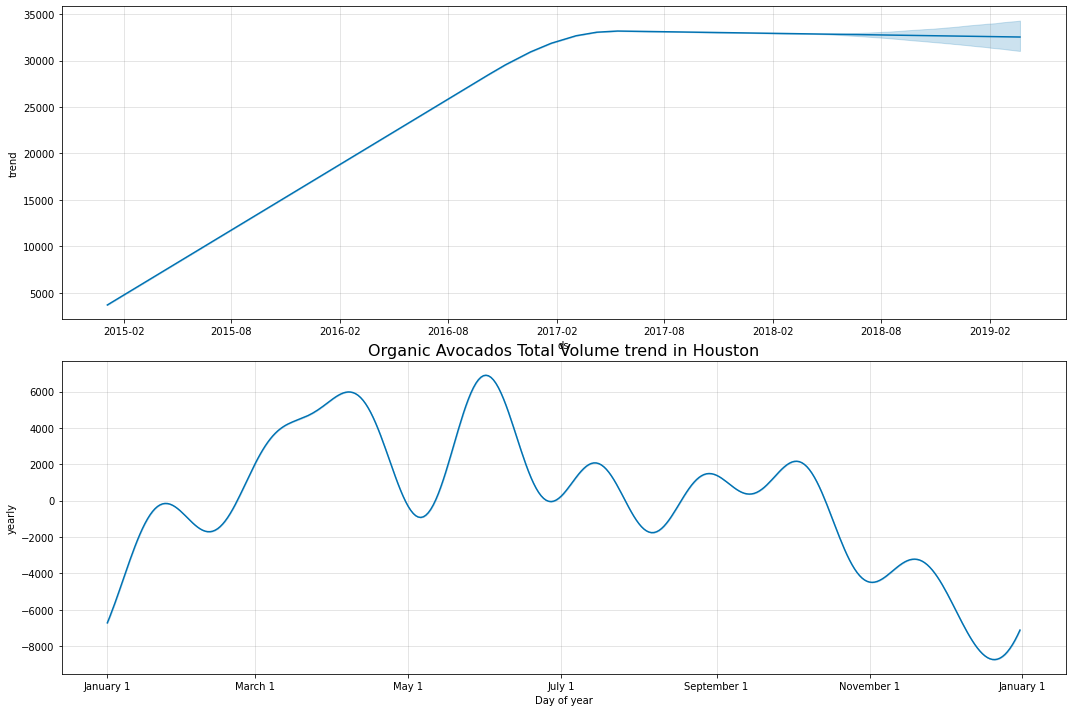

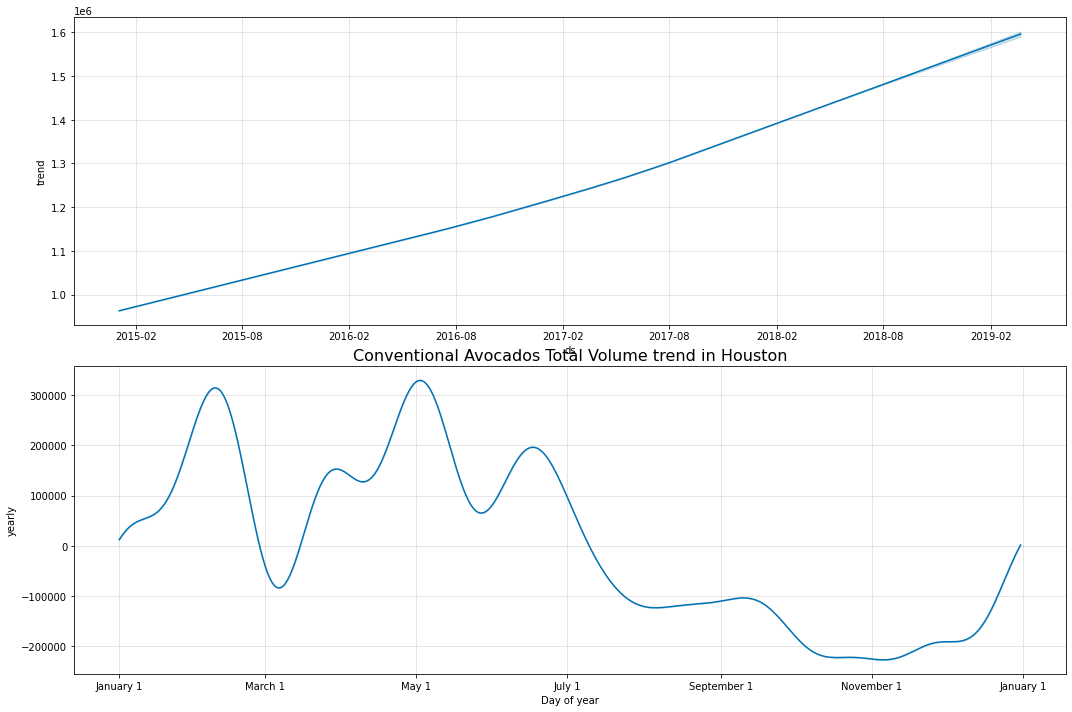

In [11]:
trend_analysis(df, 'Houston', 'Total Volume')

- Now look at the Volume forecast, the volume trend of both organic and conventional will keep continuing increased.
- The organic still remain its volume amount as last year (2017) due to this year organic Average price forecast above not low anymore, but it still acceptable.
- The conventional is making a multiplicative trend when this year and next year volume forecast increased a lot, but the price still remain like last year.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


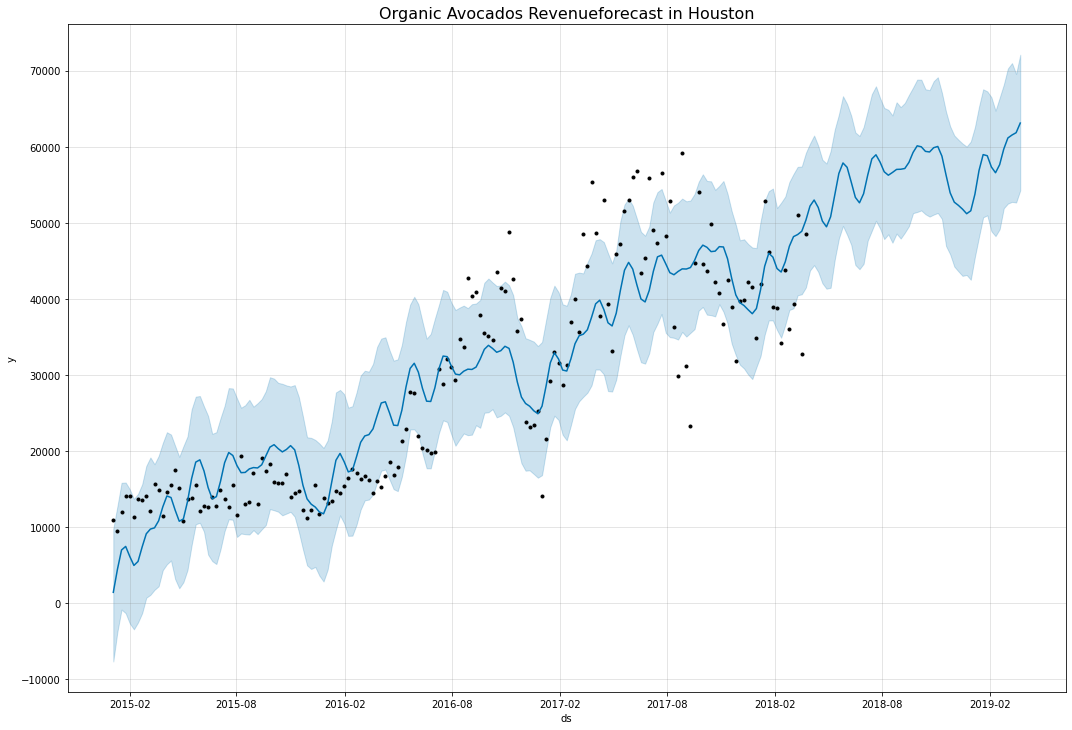

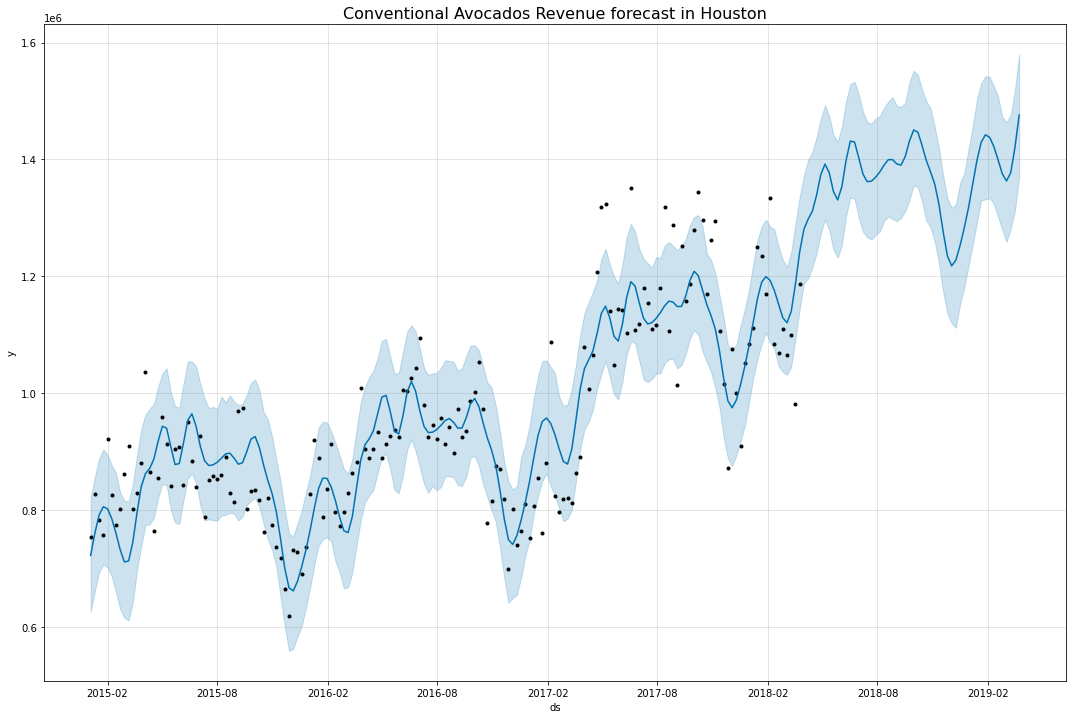

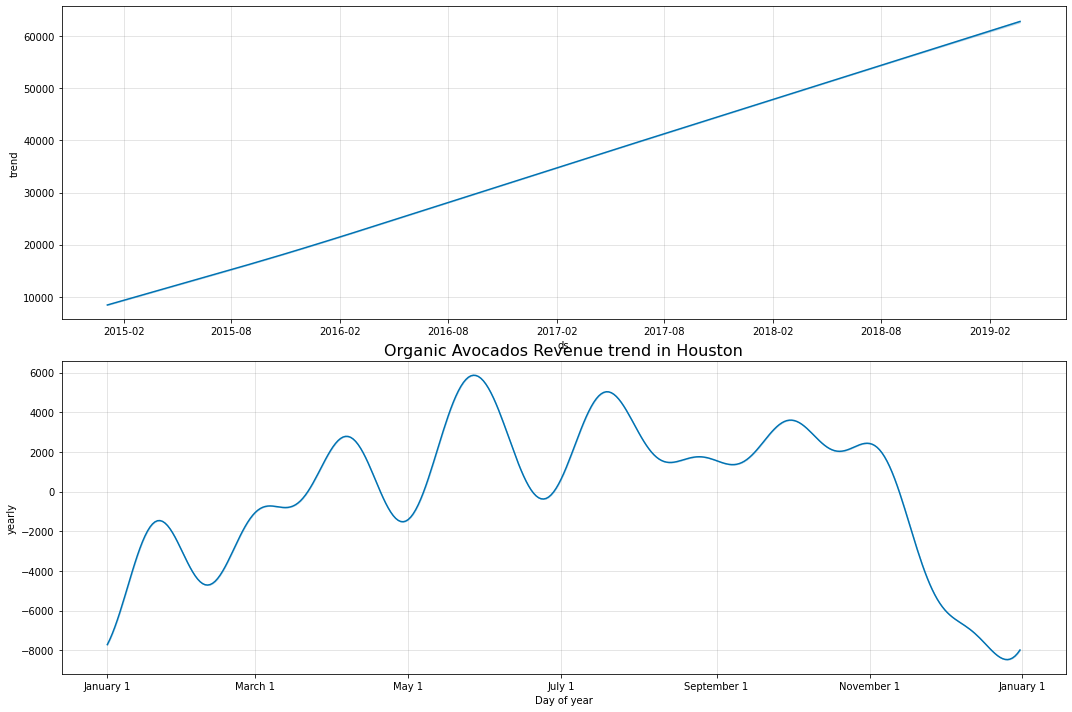

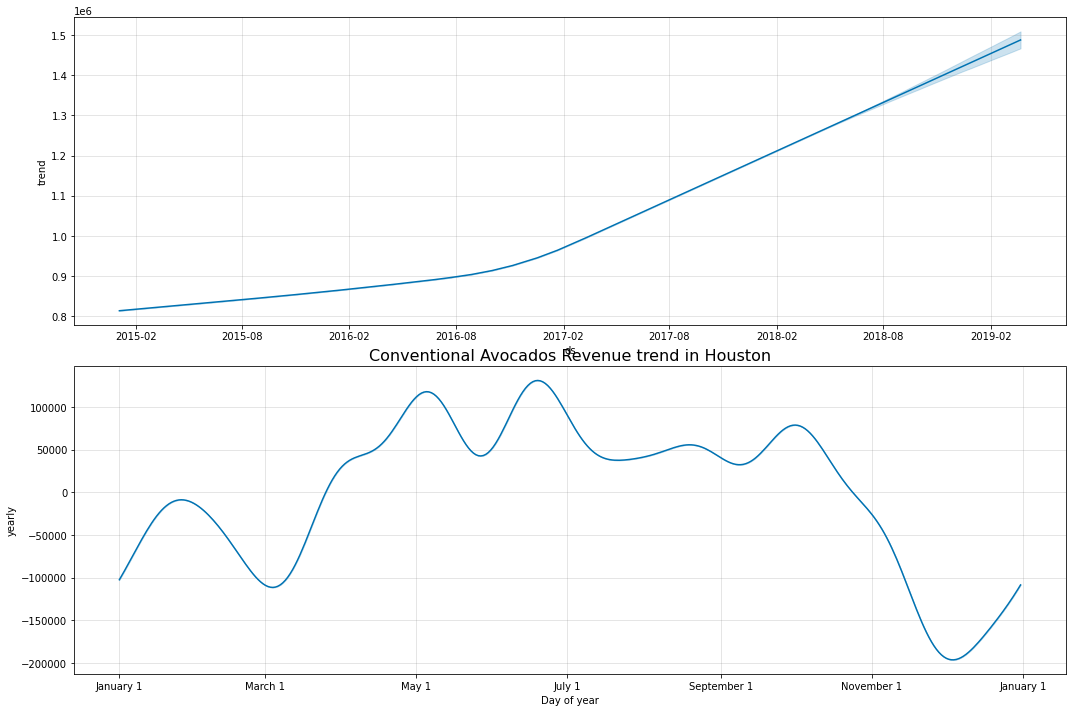

In [12]:
trend_analysis(df, 'Houston', 'Revenue')

- Finally, the revenue of organic and conventional in Houston will increased in this and next year. Conventional will be the main consume product in Houston (its revenue higher than DallasFtWorth).
#### Houston will be the new region to focus on.

### Create houston avocado organic data

In [25]:
houston_o = df[['Date', 'AveragePrice', 'Total Volume']][(df['type'] == 'organic') & (df['region'] == 'Houston')]

In [26]:
houston_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 10062 to 17828
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          169 non-null    object 
 1   AveragePrice  169 non-null    float64
 2   Total Volume  169 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.3+ KB


Need to convert Date column data type

In [27]:
houston_o.head(60)

,Date,AveragePrice,Total Volume
10062,2015-12-27,1.31,10598.30
10063,2015-12-20,1.27,9253.24
10064,2015-12-13,1.35,11494.89
10065,2015-12-06,1.49,8216.98
10066,2015-11-29,1.51,7442.68
10067,2015-11-22,1.50,8158.36
10068,2015-11-15,1.50,9857.51
10069,2015-11-08,1.44,10027.49
10070,2015-11-01,1.49,9377.04
10071,2015-10-25,1.48,11445.39


In [28]:
houston_o.tail(20)

,Date,AveragePrice,Total Volume
15740,2017-02-19,0.89,41481.08
15741,2017-02-12,0.92,33984.51
15742,2017-02-05,0.93,30857.91
15743,2017-01-29,0.93,33928.66
15744,2017-01-22,0.94,35076.15
15745,2017-01-15,0.95,30698.94
15746,2017-01-08,1.07,20116.95
15747,2017-01-01,1.40,10109.46
17817,2018-03-25,1.31,36999.72
17818,2018-03-18,1.07,30564.40


In [29]:
#Set the date column into it right data type
houston_o['Date'] = pd.to_datetime(houston_o['Date'])

In [30]:
houston_o.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
dtype: object

In [31]:
#Sort the Date column ascending
houston_o.sort_values(by=['Date'], inplace=True, ascending=True)

In [32]:
houston_o.set_index('Date', drop = True, inplace = True)

In [33]:
houston_o['Revenue'] = houston_o['AveragePrice'] * houston_o['Total Volume']

In [34]:
houston_o.head()

,AveragePrice,Total Volume,Revenue
Date,,,
2015-01-04,1.22,8938.32,10904.7504
2015-01-11,1.26,7561.00,9526.8600
2015-01-18,1.20,9979.64,11975.5680
2015-01-25,1.24,11398.91,14134.6484
2015-02-01,1.15,12285.76,14128.6240


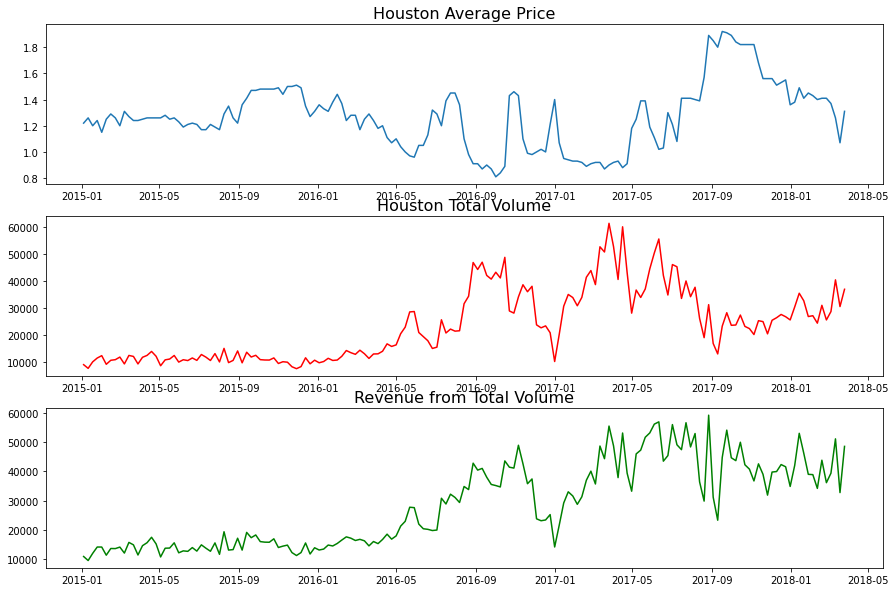

In [37]:
plt.figure(figsize = (15, 10))

plt.subplot(3,1,1)
plt.plot(houston_o['AveragePrice'])
plt.title('Houston Average Price', size = 16)

plt.subplot(3,1,2)
plt.plot(houston_o['Total Volume'], color = 'r')
plt.title('Houston Total Volume', size = 16)


plt.subplot(3,1,3)
plt.plot(houston_o['Revenue'], color = 'g')
plt.title('Revenue from Total Volume', size = 16)

plt.savefig('trend3.png')
plt.show()

- There is a seasonal trend from 2015 to 2018:
- The trend of AveragePrice will droped down from Spring until May Summer and continued through years. In the opposite, Total Volume trend will raised from the begining of Spring until droped down in May. Also with revenue.

# Seasonal Decompose

In [24]:
def season_decompose(data, feature):
    result = seasonal_decompose(houston_o[feature], model = 'multiplicative', period = 52)
    plt.rcParams['figure.figsize'] = (14, 9)
    result.plot()
    plt.show()

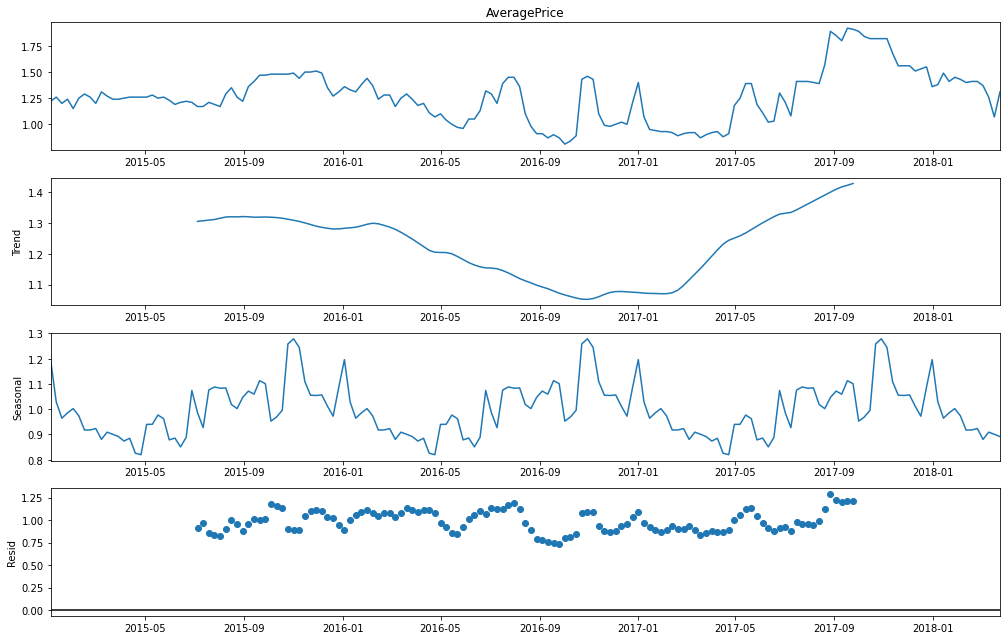

In [25]:
season_decompose(houston_o, 'AveragePrice')

- The Average trend rised up really fast from 2017 to present. And because this is still a new market, and the consumer does not like organic than convinced so the trend still have fluctuation.
- The spring - summer season are the suitable season for selling organic avocado when the price droped down, and Volume increased.

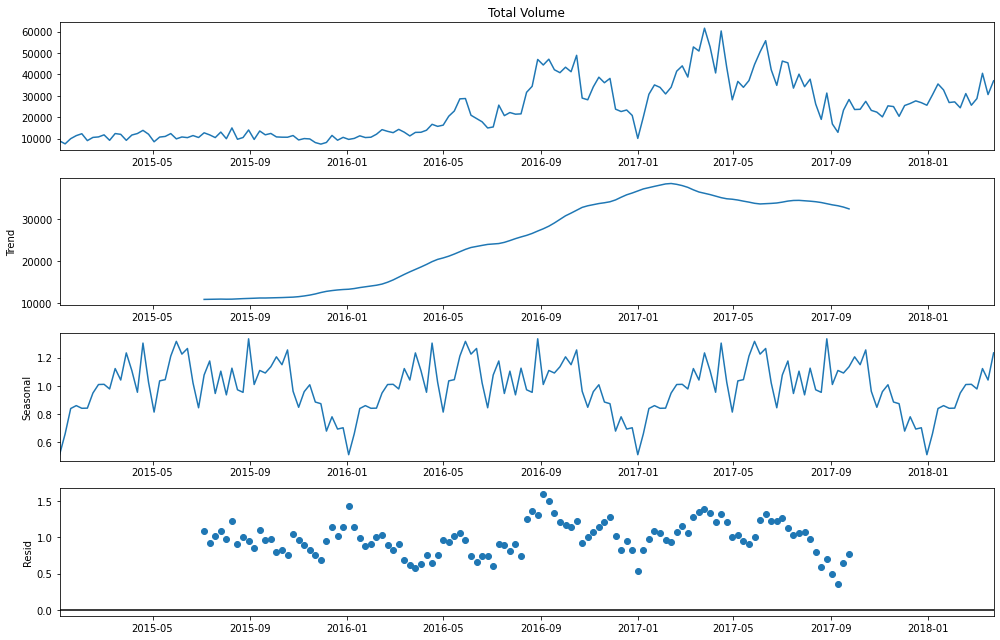

In [26]:
season_decompose(houston_o, 'Total Volume')

- The Total Volume increased from 2016 and decreased in 2017.
- There is a seasonal through years.

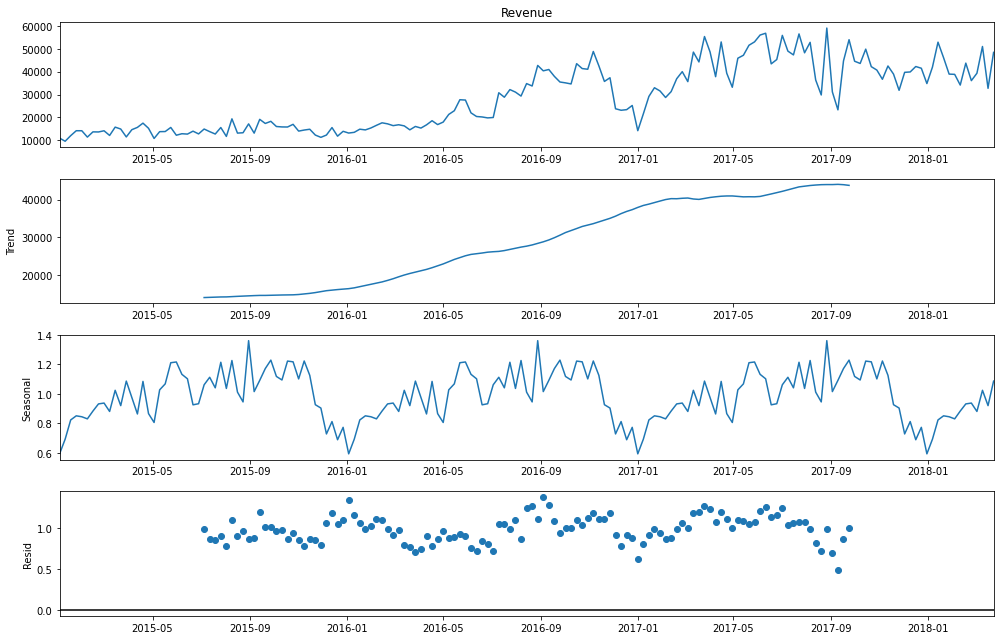

In [27]:
season_decompose(houston_o, 'Revenue')

- As I mentioned, Spring - summer is the suitable moment for making profit, the revenue increased from 2015 to present.

# Select train/test data

In [38]:
#Select X_train/test

train = houston_o['AveragePrice'].loc['2015-01-04': '2017-12-31']
test = houston_o['AveragePrice'].loc['2018-01-07':]

print('Train size:', len(train), '\t\t\t Test size:', len(test))
print('Test size percentage:', round(len(test)/houston_o.shape[0], 2))

Train size: 157 			 Test size: 12
Test size percentage: 0.07


- train data: 157 weeks (3year | 2015 - 12/2017)
- test data: 12 weeks (the first 3 months of 2018)

# Auto Arima

In [29]:
stepwise_model = auto_arima(houston_o['AveragePrice'], start_p=2, start_q=2,
                           m = 52,
                           start_P=1, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print('AIC of the best model: ',stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[52]             : AIC=-135.639, Time=48.84 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=-112.435, Time=0.47 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=-136.128, Time=8.21 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=18.56 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=-115.854, Time=0.51 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=inf, Time=31.67 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=38.67 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=23.73 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=-133.880, Time=51.85 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=-135.873, Time=7.80 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=inf, Time=12.55 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=-136.583, Time=13.45 sec
 ARIMA(1,1,1)(0,1,0)[52]             : AIC=-114.788, Time=0.89 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=-135.559, Time=60.14 sec
 ARIMA(1,1,1)(1,1,1)[52]           

In [30]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(1, 1, 0, 52),
      suppress_warnings=True, with_intercept=False)

In [40]:
import pmdarima as pm
arima = pm.ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(1, 1, 0, 52),
      suppress_warnings=True, with_intercept=False)
arima.fit(train)

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(1, 1, 0, 52),
      suppress_warnings=True, with_intercept=False)

In [30]:
import pickle
with open('pmdarima3.pkl', 'wb') as pkl:
    pickle.dump(arima, pkl)

In [41]:
arima_forecast = arima.predict(n_periods=len(test))   #n_periods: khoang thoi gian can du bao

In [42]:
arima_forecast = pd.DataFrame(arima_forecast, index = test.index, columns = ['Prediction'])

[]

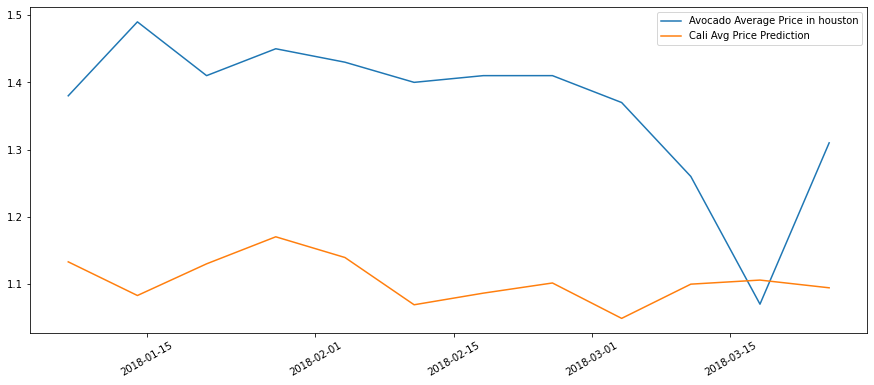

In [43]:
plt.figure(figsize = (15, 6))
plt.subplot(1,1,1)
plt.plot(test, label = 'Avocado Average Price in houston')
plt.plot(arima_forecast, label = 'Cali Avg Price Prediction')
plt.xticks(rotation = 30)
plt.legend(loc = 'best')
plt.plot()

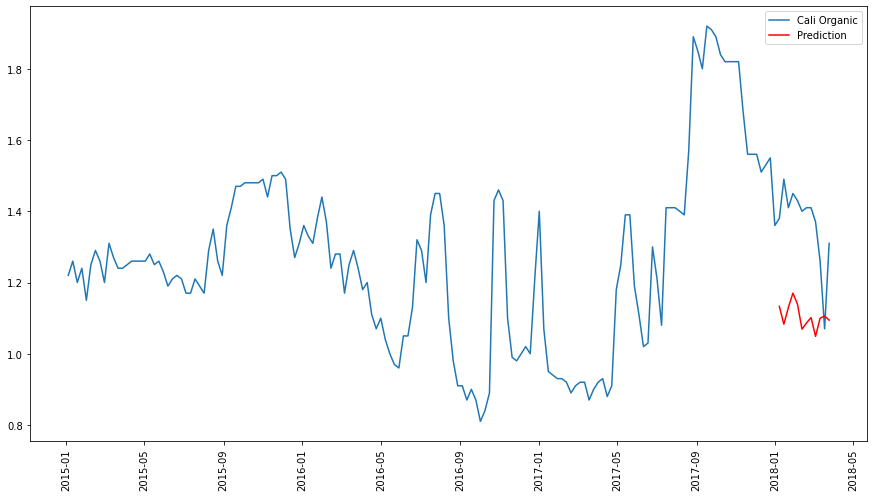

In [44]:
plt.figure(figsize = (15,8))
plt.plot(houston_o['AveragePrice'], label = 'Cali Organic')
plt.plot(arima_forecast, label = 'Prediction', color = 'red')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

- The prediction of the first 3 months of 2018 seem difference when there is a huge magin/great fluctuations.
- The mae quite big (0.26), I will try with fpprophet.

In [45]:
mae = mean_absolute_error(test, arima_forecast[0:len(test)])
mae

0.26670374414145354

In [46]:
test.mean()

1.3658333333333335

### Predict for the next 40 weeks (2018)

In [47]:
arima_forecast_40 = arima.predict(n_periods=len(test) + 40)

[]

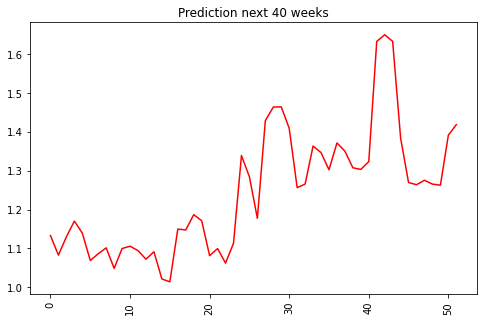

In [48]:
plt.figure(figsize = (8,5))
plt.plot(arima_forecast_40, color = 'red')
plt.xticks(rotation = 'vertical')
plt.title('Prediction next 40 weeks')
plt.plot()

##### Create dataframe for the next 40 week of 2018

In [49]:
#create dât for the next 40 weeks of 2018
weekdays = pd.date_range('2018-04-01', '2018-12-31', freq = 'W').strftime("%Y-%m-%d").tolist()

In [50]:
arima_forecast_40 = pd.DataFrame({'DATE': weekdays,
                                   'houston_o_prediction':arima_forecast_40[len(test):]})

In [51]:
arima_forecast_40['DATE'] = pd.to_datetime(arima_forecast_40['DATE'])

In [52]:
arima_forecast_40.set_index('DATE', drop = True, inplace = True)

In [53]:
arima_forecast_40.head()

,houston_o_prediction
DATE,
2018-04-01,1.072398
2018-04-08,1.091454
2018-04-15,1.021606
2018-04-22,1.014313
2018-04-29,1.149669


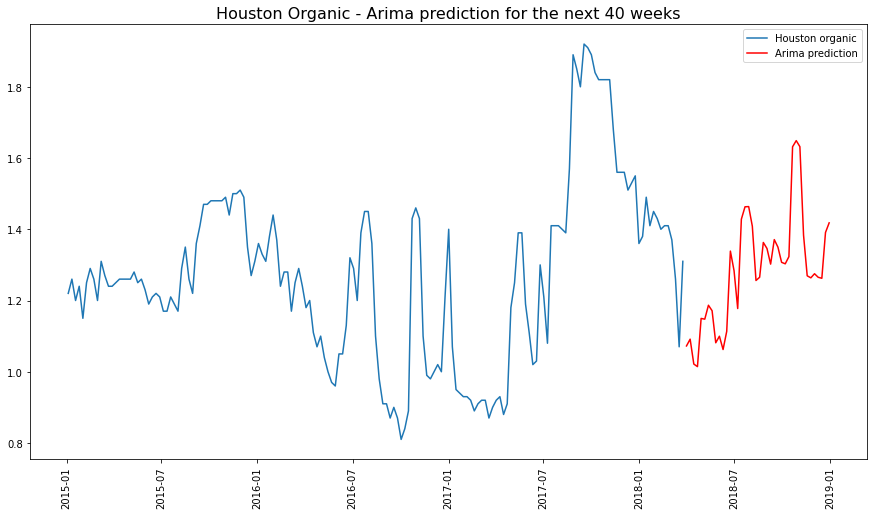

In [91]:
plt.figure(figsize = (15,8))
plt.plot(houston_o['AveragePrice'], label = 'Houston organic')
plt.plot(arima_forecast_40['houston_o_prediction'], label = 'Arima prediction', color = 'red')
plt.xticks(rotation = 'vertical')
plt.title('Houston Organic - Arima prediction for the next 40 weeks', size = 16)
plt.legend()
plt.savefig("arima3.png")
plt.show()

- In the next 40 weeks, the Arima model showed that price this year will be lower than 2017.
- But because the mse quite high, so that this result not convinced much.

# Holtwinter

In [55]:
holtwinter_model = ExponentialSmoothing(train, seasonal = 'mul',
                             seasonal_periods = 52).fit()
holtwinter_pred = holtwinter_model.predict(start = test.index[0], end = test.index[-1])

c:\program files\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


In [77]:
with open('holtwinter3.pkl', 'wb') as pkl:
    pickle.dump(holtwinter_model, pkl)

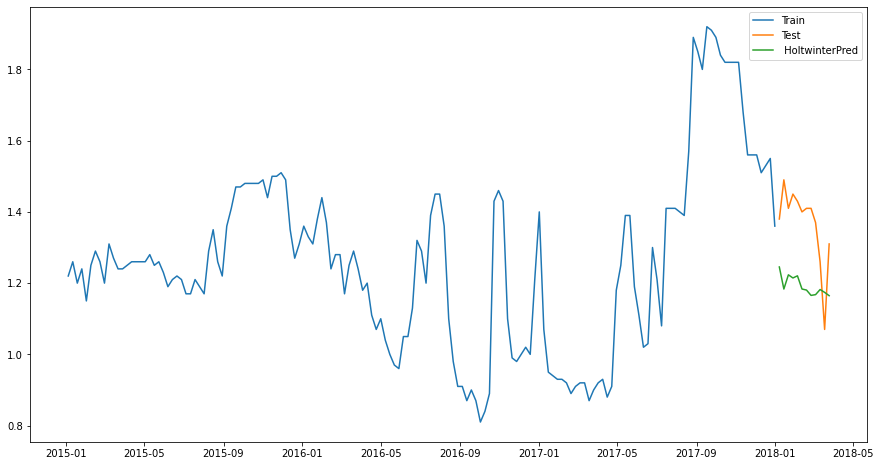

In [56]:
plt.figure(figsize = (15,8))
plt.plot(train.index, train, label = 'Train')
plt.plot(test.index, test, label = 'Test')
plt.plot(holtwinter_pred.index, holtwinter_pred, label = ' HoltwinterPred')
plt.legend(loc = 'best')

In [57]:
mae = mean_absolute_error(test, holtwinter_pred[0:len(test)])
mae

0.19108936018909886

##### Create next 40 weeks dataframe for Holtwinter prediction

In [58]:
e = datetime.datetime(2018,12,31)
holtwinter_forecast_40 = holtwinter_model.predict(start = test.index[-1], end = e)
holtwinter_forecast_40 = holtwinter_forecast_40
holtwinter_forecast_40 = pd.Series(holtwinter_forecast_40)

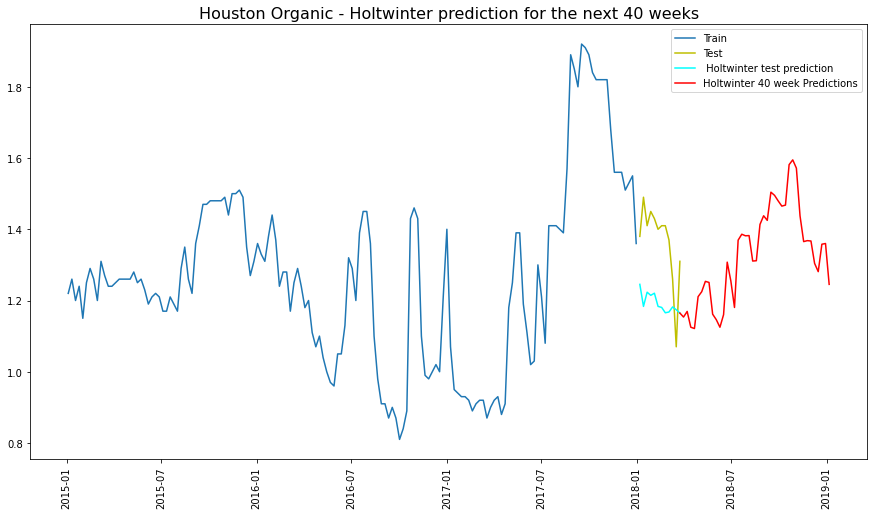

In [59]:
plt.figure(figsize = (15,8))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test', color = 'y')
plt.plot(holtwinter_pred.index, holtwinter_pred, label = ' Holtwinter test prediction', color = 'cyan')
plt.plot(holtwinter_forecast_40, label = 'Holtwinter 40 week Predictions', color = 'red')
plt.xticks(rotation = 'vertical')
plt.title("Houston Organic - Holtwinter prediction for the next 40 weeks", size = 16)
plt.legend()
plt.savefig("holtwinter3.png")
plt.show()

##### Holtwinter Result:
- The price still happened same case with Arima.
- The Holwinter mse is the lower than Arima, but give the same prediction result. I will make a prediction with fbprophet model for advance.

# fbprophet

In [60]:
prophet_df = houston_o['AveragePrice'].copy()
prophet_df = prophet_df.reset_index()

In [61]:
prophet_df.columns = ['ds', 'y']

In [62]:
prophet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      169 non-null    datetime64[ns]
 1   y       169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


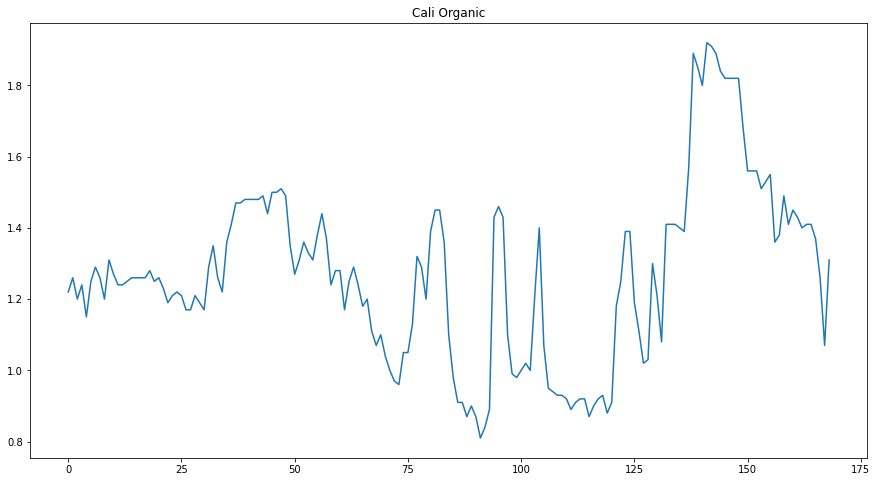

In [63]:
plt.figure(figsize = (15,8))
plt.plot(prophet_df.y)
plt.title('Cali Organic')
plt.show()

- Same plot as above

##### Create train/test data for prophet

In [64]:
#train/test split
train = prophet_df.drop(prophet_df.index[-12:])
test = prophet_df.drop(prophet_df.index[0:-12])

In [65]:
train.tail()

,ds,y
152,2017-12-03,1.56
153,2017-12-10,1.51
154,2017-12-17,1.53
155,2017-12-24,1.55
156,2017-12-31,1.36


In [66]:
test

,ds,y
157,2018-01-07,1.38
158,2018-01-14,1.49
159,2018-01-21,1.41
160,2018-01-28,1.45
161,2018-02-04,1.43
162,2018-02-11,1.40
163,2018-02-18,1.41
164,2018-02-25,1.41
165,2018-03-04,1.37
166,2018-03-11,1.26


In [67]:
prophet_model = Prophet(yearly_seasonality = True, daily_seasonality = False, weekly_seasonality = True)

There is a weekly seasonaality through year so I decided setting the parameter of year and week as True

In [68]:
prophet_model.fit(train)

In [78]:
with open('fbprophet3.pkl', 'wb') as pkl:
    pickle.dump(prophet_model, pkl)

##### Create data prediction for the whole 2018

In [69]:
#create data for 2018
weeks = pd.date_range('2018-01-07', '2018-12-31',
                      freq = 'W').strftime('%Y-%m-%d').tolist()
prophet_future = pd.DataFrame(weeks)
prophet_future.columns = ['ds']
prophet_future['ds'] = pd.to_datetime(prophet_future['ds'])

In [70]:
prophet_forecast = prophet_model.predict(prophet_future)

In [71]:
prophet_forecast[['ds', 'yhat']]

,ds,yhat
0,2018-01-07,1.599802
1,2018-01-14,1.591061
2,2018-01-21,1.582643
3,2018-01-28,1.580054
4,2018-02-04,1.585823
5,2018-02-11,1.595068
6,2018-02-18,1.599150
7,2018-02-25,1.595425
8,2018-03-04,1.591986
9,2018-03-11,1.599921


In [72]:
print('Mean of original data', prophet_df.y.mean())
print('Mean of test data',test.y.mean())

Mean of original data 1.2707692307692307
Mean of test data 1.3658333333333335


In [73]:
y_test = test['y'].values
y_pred = prophet_forecast['yhat'].values[:12]
mae_p = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f'% mae_p)

rmse_p = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.3f' %rmse_p)

MAE: 0.232
RMSE: 0.260


The mae score of prophet model higher than Holtwinter and lower tha nArima

In [74]:
y_test_value = pd.DataFrame(y_test, index = pd.to_datetime(test['ds']),columns=['Actual'])
y_pred_value = pd.DataFrame(y_pred, index = pd.to_datetime(test['ds']),columns=['Prediction'])

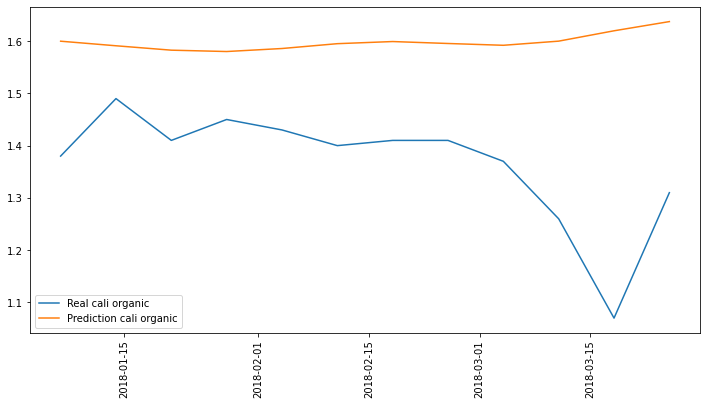

In [75]:
# Visulaize the result
plt.figure(figsize=(12,6))
plt.plot(y_test_value, label='Real cali organic')
plt.plot(y_pred_value, label='Prediction cali organic')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

C:\Users\DELL\AppData\Local\Temp/ipykernel_17548/1313328995.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


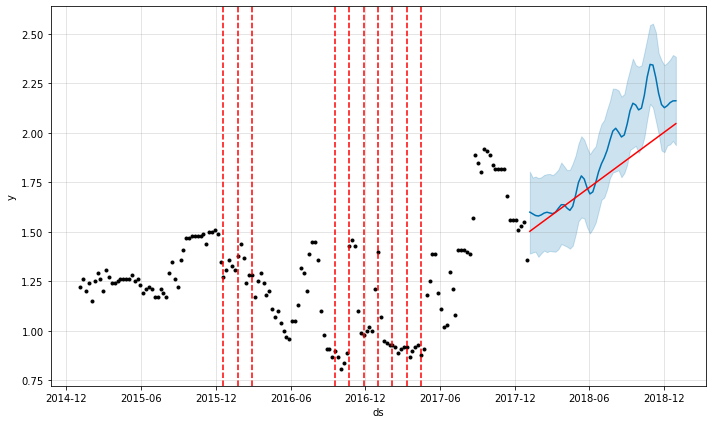

In [76]:
fig = prophet_model.plot(prophet_forecast)
fig.show()
a = add_changepoints_to_plot(fig.gca(), prophet_model, prophet_forecast)

C:\Users\DELL\AppData\Local\Temp/ipykernel_17548/694214153.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


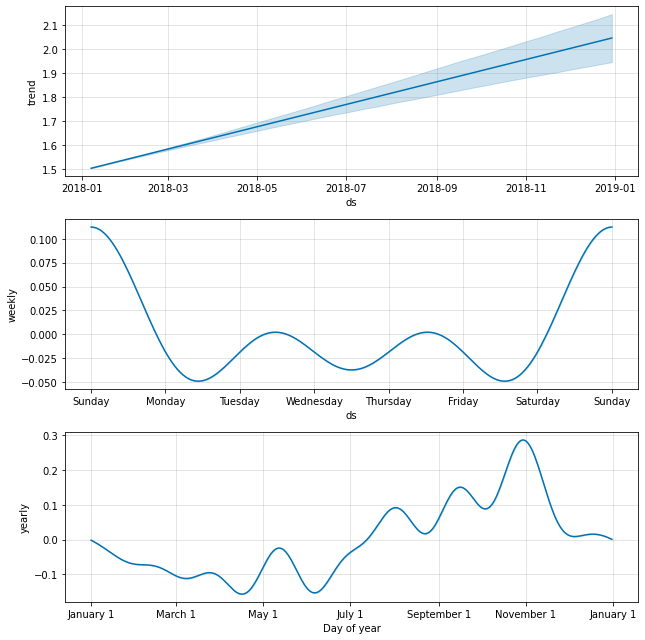

In [77]:
fig1 = prophet_model.plot_components(prophet_forecast)
fig1.show()

- Trend will increased from 2018 to 2019
- Same scenario as Arima model, the trend rised up from summer or fall and droped down really fast at the beginning of spring. This time people does not buy avocados until price low in Jan - May.
- But in this model, we can see activity are really high at the weekend (weekly plot) because customer usually buy stuff for the whole week.

### Long term predict

In [78]:
m = Prophet(yearly_seasonality = True, daily_seasonality = False, weekly_seasonality = False)
m.fit(prophet_df)
prophet_future = m.make_future_dataframe(periods = 54*1, freq = 'W')

In [79]:
prophet_forecast_40 = m.predict(prophet_future)

In [80]:
prophet_forecast_40.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          223 non-null    datetime64[ns]
 1   trend                       223 non-null    float64       
 2   yhat_lower                  223 non-null    float64       
 3   yhat_upper                  223 non-null    float64       
 4   trend_lower                 223 non-null    float64       
 5   trend_upper                 223 non-null    float64       
 6   additive_terms              223 non-null    float64       
 7   additive_terms_lower        223 non-null    float64       
 8   additive_terms_upper        223 non-null    float64       
 9   yearly                      223 non-null    float64       
 10  yearly_lower                223 non-null    float64       
 11  yearly_upper                223 non-null    float64       

In [81]:
prophet_forecast_40[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
211,2019-01-20,1.845031,1.615831,2.033809,1.913749,1.867894,1.960652
212,2019-01-27,1.837257,1.618033,2.047925,1.921316,1.874178,1.970084
213,2019-02-03,1.835271,1.625649,2.065842,1.928884,1.880048,1.979402
214,2019-02-10,1.841096,1.629297,2.066898,1.936452,1.886416,1.988981
215,2019-02-17,1.847180,1.628327,2.070615,1.944020,1.892469,1.997547
216,2019-02-24,1.839831,1.629936,2.056371,1.951587,1.898269,2.006881
217,2019-03-03,1.815808,1.599580,2.032792,1.959155,1.903748,2.015728
218,2019-03-10,1.791893,1.579416,2.018018,1.966723,1.909440,2.025728
219,2019-03-17,1.791362,1.572158,2.035600,1.974290,1.915109,2.035268
220,2019-03-24,1.818635,1.589716,2.043205,1.981858,1.920892,2.044472


C:\Users\DELL\AppData\Local\Temp/ipykernel_17548/3619656754.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


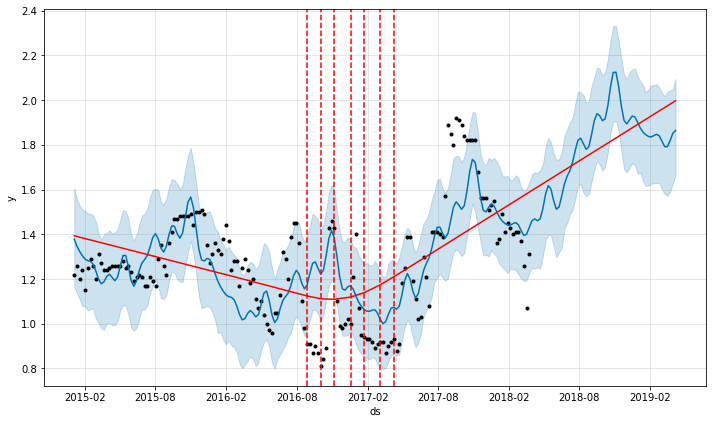

In [82]:
fig = m.plot(prophet_forecast_40)
fig.show()
a = add_changepoints_to_plot(fig.gca(), m, prophet_forecast_40)

- The prophet model prediction give the same result as arima:
    - The trend will be continued and its price will be the highest of all year.

C:\Users\DELL\AppData\Local\Temp/ipykernel_17548/71187928.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


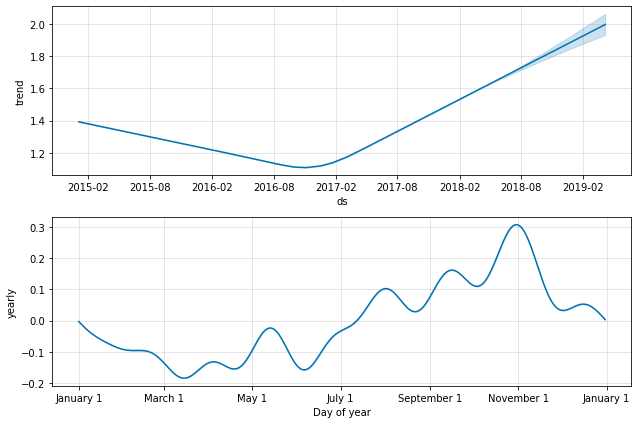

In [83]:
fig1 = m.plot_components(prophet_forecast_40)
fig1.show()

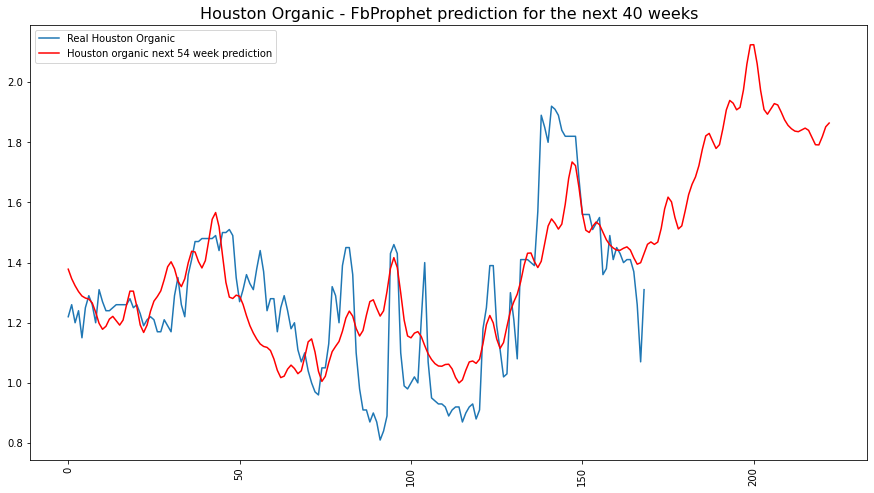

In [90]:
plt.figure(figsize=(15,8))
plt.plot(prophet_df['y'], label='Real Houston Organic')
plt.plot(prophet_forecast_40['yhat'], label='Houston organic next 54 week prediction', 
         color='red')
plt.xticks(rotation='vertical')
plt.title("Houston Organic - FbProphet prediction for the next 40 weeks", size = 16)
plt.legend()
plt.savefig("fbprophet3.png")
plt.show()

- Prophet trend seem quite safe, showed that it can react with fluctuation just like Arima and Holtwinter.
- The Houston organic market will be continuing its trend acording to prophet model.

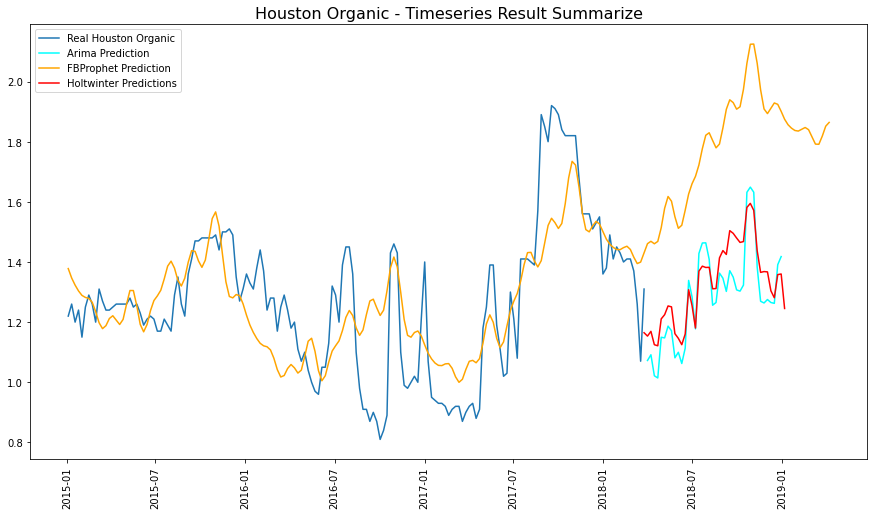

In [89]:
plt.figure(figsize=(15,8))
plt.plot(houston_o['AveragePrice'], label='Real Houston Organic')
plt.plot(arima_forecast_40['houston_o_prediction'], label = 'Arima Prediction', color = 'cyan')
plt.plot(prophet_forecast_40[['ds', 'yhat']].set_index('ds'), label='FBProphet Prediction', 
         color='orange')
plt.plot(holtwinter_forecast_40, label = 'Holtwinter Predictions', color = 'red')
plt.title("Houston Organic - Timeseries Result Summarize", size = 16)
plt.xticks(rotation='vertical')
plt.legend()
plt.savefig("result_summarize3.png")
plt.show()

##### In conclusion:
- The Arima and Holtwinter will be best fit with the data, when those 2 model gave the  same result. We can make profit with organic avocado. But must have backup plan if the price happened like prophet model showed.
- Those 2 model are good, it showed us the price will continuing low in 2018 and 2019, I still doubt about those 3 result.
- So that houston will be our new market in this year for Organic product.

### Thank you very much for your time